In [ ]:
#Practical 1 Write a program to implement logical gates AND,OR and NOT with McCulloch-Pitts
def McCulloch_Pitts(inputs, weights, threshold):
    net_input = sum([i * w for i, w in zip(inputs, weights)])
    return 1 if net_input >= threshold else 0

# AND Gate
print("AND Gate")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"Input: {x1}, {x2} → Output: {McCulloch_Pitts([x1, x2], [1, 1], 2)}")

# OR Gate
print("\nOR Gate")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"Input: {x1}, {x2} → Output: {McCulloch_Pitts([x1, x2], [1, 1], 1)}")

# NOT Gate
print("\nNOT Gate")
for x in [0, 1]:
    print(f"Input: {x} → Output: {McCulloch_Pitts([x], [-1], 0)}")


AND Gate
Input: 0, 0 → Output: 0
Input: 0, 1 → Output: 0
Input: 1, 0 → Output: 0
Input: 1, 1 → Output: 1

OR Gate
Input: 0, 0 → Output: 0
Input: 0, 1 → Output: 1
Input: 1, 0 → Output: 1
Input: 1, 1 → Output: 1

NOT Gate
Input: 0 → Output: 1
Input: 1 → Output: 0


In [ ]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
w1 = [1, 1, 1, 1]
w2 = [1, 1, 1, 1]
t = 2  # threshold

print("x1 x2 w1 w2 t  o")  # header row
for i in range(len(x1)):
    net_input = x1[i] * w1[i] + x2[i] * w2[i]
    output = 1 if net_input >= t else 0
    print(x1[i], x2[i], w1[i], w2[i], t, output)


x1 x2 w1 w2 t  o
0 0 1 1 2 0
0 1 1 1 2 0
1 0 1 1 2 0
1 1 1 1 2 1


In [1]:
#Practical 2 Write a program to implement Hebb‟s rule
import numpy as np

# Input patterns
x1 = np.array([1, 1, 1, -1, 1, -1, 1, 1, 1])   # First input
x2 = np.array([1, 1, 1,  1, -1, 1, 1, 1, 1])   # Second input

# Target outputs
y = np.array([1, -1])

# Initial weights and bias
wt_old = np.zeros((9,), dtype=int)
b = 0

# ---- FIRST INPUT ----
print("First input with target = 1")
for i in range(9):
    wt_old[i] = wt_old[i] + x1[i] * y[0]

wt_new = wt_old.copy()
b = b + y[0]

print("Old weight =", wt_old)
print("Bias value =", b)
print("\n")

# ---- SECOND INPUT ----
print("Second input with target = -1")
for i in range(9):
    wt_new[i] = wt_old[i] + x2[i] * y[1]

b = b + y[1]

print("New weight =", wt_new)
print("Bias value =", b)


First input with target = 1
Old weight = [ 1  1  1 -1  1 -1  1  1  1]
Bias value = 1


Second input with target = -1
New weight = [ 0  0  0 -2  2 -2  0  0  0]
Bias value = 0


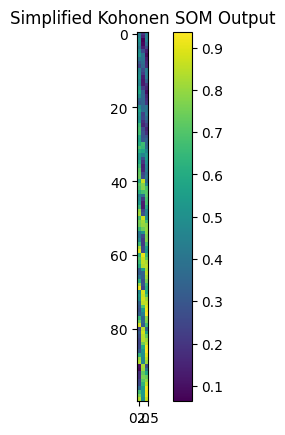

In [2]:
#Practical 3 Implement Kohonen Self organizing map
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random input data (100 samples with 3 features)
data = np.random.rand(100, 3)

# Step 2: Initialize SOM grid (10x10 neurons), each with 3 weights
som_x, som_y = 10, 10
input_len = 3
weights = np.random.rand(som_x, som_y, input_len)

# Step 3: Set training parameters
learning_rate = 0.5
radius = max(som_x, som_y) / 2
radius_decay = 0.99
learning_rate_decay = 0.99
num_iterations = 1000

# Step 4: Train the SOM
for iteration in range(num_iterations):
    # Pick a random sample
    sample = data[np.random.randint(0, len(data))]

    # Find Best Matching Unit (BMU)
    distances = np.linalg.norm(weights - sample, axis=-1)
    bmu_index = np.unravel_index(np.argmin(distances), (som_x, som_y))

    # Update weights of BMU and its neighbors
    for i in range(som_x):
        for j in range(som_y):
            dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu_index))
            if dist_to_bmu <= radius:
                influence = np.exp(-dist_to_bmu**2 / (2 * (radius**2)))
                weights[i, j] += influence * learning_rate * (sample - weights[i, j])

    # Decay learning rate and radius
    learning_rate *= learning_rate_decay
    radius *= radius_decay

# Step 5: Visualize SOM as color grid
flat_weights = weights.reshape(som_x * som_y, input_len)
plt.imshow(flat_weights, cmap='viridis')
plt.colorbar()
plt.title("Simplified Kohonen SOM Output")
plt.show()


In [3]:
#Practical 4 Solve the Hamming network given the exemplarvectors
import numpy as np

# Step 1: Define the exemplar vectors (pre-defined inputs)
exemplar_vectors = np.array([
    [1, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 0]
])

# Step 2: Define the input vector
input_vector = np.array([1, 0, 1, 1, 0, 1, 0, 1])

# Step 3: Hamming distance function
def hamming_distance(v1, v2):
    """
    Compute the Hamming distance between two binary vectors.
    """
    return np.sum(v1 != v2)

# Step 4: Hamming network to find closest exemplar
def hamming_network(input_vector, exemplar_vectors):
    """
    Find the exemplar vector with the smallest Hamming distance to the input vector.
    """
    distances = np.array([hamming_distance(input_vector, ev) for ev in exemplar_vectors])
    min_distance_index = np.argmin(distances)
    return min_distance_index, distances[min_distance_index]

# Step 5: Run the network
index, distance = hamming_network(input_vector, exemplar_vectors)

# Step 6: Output the result
print(f"The input vector is closest to exemplar vector at index {index} with a Hamming distance of {distance}.")


The input vector is closest to exemplar vector at index 0 with a Hamming distance of 2.


In [4]:
#Practical 5 Write a program for implementing BAM network
import numpy as np

# Defining BAM class
class BAM:
    def __init__(self):
        self.weights = None

    def train(self, patterns_A, patterns_B):
        """
        Train weights using Hebbian learning rule.
        """
        num_features_A = patterns_A.shape[1]
        num_features_B = patterns_B.shape[1]
        self.weights = np.zeros((num_features_A, num_features_B))

        for a, b in zip(patterns_A, patterns_B):
            self.weights += np.outer(a, b)

    def recall_A(self, pattern_B):
        """
        Recall pattern A given pattern B.
        """
        result = np.dot(pattern_B, self.weights.T)
        return np.sign(result)

    def recall_B(self, pattern_A):
        """
        Recall pattern B given pattern A.
        """
        result = np.dot(pattern_A, self.weights)
        return np.sign(result)

# Example usage
if __name__ == "__main__":
    # Step 1: Define the training patterns
    patterns_A = np.array([
        [1, 1, -1],
        [-1, 1, 1],
        [-1, -1, -1]
    ])

    patterns_B = np.array([
        [1, -1],
        [-1, 1],
        [1, 1]
    ])

    # Step 2: Initialize and train BAM
    bam = BAM()
    bam.train(patterns_A, patterns_B)

    # Step 3: Test recall for pattern B
    test_pattern_B = np.array([1, -1])
    recalled_pattern_A = bam.recall_A(test_pattern_B)
    print("Recalled Pattern A for test pattern B", test_pattern_B, "is:", recalled_pattern_A)

    # Step 4: Test recall for pattern A
    test_pattern_A = np.array([1, 1, -1])
    recalled_pattern_B = bam.recall_B(test_pattern_A)
    print("Recalled Pattern B for test pattern A", test_pattern_A, "is:", recalled_pattern_B)


Recalled Pattern A for test pattern B [ 1 -1] is: [ 1.  0. -1.]
Recalled Pattern B for test pattern A [ 1  1 -1] is: [ 1. -1.]


In [5]:
#Practical 6 Implement a program to find the winning neuron using MaxNet
import numpy as np

def maxnet(input_vector, epsilon=0.1, max_iterations=100):
    activations = np.copy(input_vector)

    for _ in range(max_iterations):
        # Compute inhibition from all other neurons
        inhibition = epsilon * (np.sum(activations) - activations)
        # Update activations
        activations = activations - inhibition
        # Set negative activations to zero
        activations[activations < 0] = 0

        # If only one neuron is left active, stop
        if np.count_nonzero(activations) == 1:
            break

    # Return the index of the winning neuron
    return np.argmax(activations)

# Example usage
input_vector = np.array([0.2, 0.5, 0.1, 0.7, 0.4])
winning_neuron = maxnet(input_vector)

print(f"The winning neuron is at index {winning_neuron} with activation {input_vector[winning_neuron]}")


The winning neuron is at index 3 with activation 0.7


In [6]:
#Practical 7 Implement De-Morgan‟s Law
def de_morgans_law_1(A, B):
    """
    Law 1: ¬(A ∨ B) = ¬A ∧ ¬B
    """
    not_A_or_B = not (A or B)
    not_A_and_not_B = (not A) and (not B)
    return not_A_or_B, not_A_and_not_B

def de_morgans_law_2(A, B):
    """
    Law 2: ¬(A ∧ B) = ¬A ∨ ¬B
    """
    not_A_and_B = not (A and B)
    not_A_or_not_B = (not A) or (not B)
    return not_A_and_B, not_A_or_not_B

# Get inputs
A = input("Enter A (True/False): ").strip().capitalize()
B = input("Enter B (True/False): ").strip().capitalize()

# Convert to Boolean
A = A == "True"
B = B == "True"

# Law 1
result_1 = de_morgans_law_1(A, B)
print("\nDe Morgan's Law 1: ¬(A ∨ B) = ¬A ∧ ¬B")
print(f"¬({A} ∨ {B}) = {result_1[0]}")
print(f"¬{A} ∧ ¬{B} = {result_1[1]}")
print(f"Law holds: {result_1[0] == result_1[1]}")

# Law 2
result_2 = de_morgans_law_2(A, B)
print("\nDe Morgan's Law 2: ¬(A ∧ B) = ¬A ∨ ¬B")
print(f"¬({A} ∧ {B}) = {result_2[0]}")
print(f"¬{A} ∨ ¬{B} = {result_2[1]}")
print(f"Law holds: {result_2[0] == result_2[1]}")


Enter A (True/False): True
Enter B (True/False): False

De Morgan's Law 1: ¬(A ∨ B) = ¬A ∧ ¬B
¬(True ∨ False) = False
¬True ∧ ¬False = False
Law holds: True

De Morgan's Law 2: ¬(A ∧ B) = ¬A ∨ ¬B
¬(True ∧ False) = True
¬True ∨ ¬False = True
Law holds: True


In [7]:
# Practical 8 Implement Union, Intersection, Complement and Difference operations on fuzzy sets
def fuzzy_union(A, B):
    return {x: max(A.get(x, 0), B.get(x, 0)) for x in set(A).union(B)}

# Intersection of Fuzzy Sets: min(A(x), B(x))
def fuzzy_intersection(A, B):
    return {x: min(A.get(x, 0), B.get(x, 0)) for x in set(A).intersection(B)}

# Complement of Fuzzy Set A: 1 - A(x)
def fuzzy_complement(A):
    return {x: 1 - A[x] for x in A}

# Difference of Fuzzy Sets: min(A(x), 1 - B(x))
def fuzzy_difference(A, B):
    return {x: min(A.get(x, 0), 1 - B.get(x, 0)) for x in set(A).union(B)}

# Example fuzzy sets
A = {'x1': 0.1, 'x2': 0.4, 'x3': 0.7}
B = {'x2': 0.5, 'x3': 0.2, 'x4': 0.8}

# Perform operations
union_result = fuzzy_union(A, B)
intersection_result = fuzzy_intersection(A, B)
complement_result_A = fuzzy_complement(A)
difference_result = fuzzy_difference(A, B)

# Display results
print("Fuzzy Set A:", A)
print("Fuzzy Set B:", B)
print("\nResults of operations on fuzzy sets:")
print("Union (A ∪ B):", union_result)
print("Intersection (A ∩ B):", intersection_result)
print("Complement (A'):", complement_result_A)
print("Difference (A - B):", difference_result)


Fuzzy Set A: {'x1': 0.1, 'x2': 0.4, 'x3': 0.7}
Fuzzy Set B: {'x2': 0.5, 'x3': 0.2, 'x4': 0.8}

Results of operations on fuzzy sets:
Union (A ∪ B): {'x1': 0.1, 'x4': 0.8, 'x3': 0.7, 'x2': 0.5}
Intersection (A ∩ B): {'x2': 0.4, 'x3': 0.2}
Complement (A'): {'x1': 0.9, 'x2': 0.6, 'x3': 0.30000000000000004}
Difference (A - B): {'x1': 0.1, 'x4': 0, 'x3': 0.7, 'x2': 0.4}


In [8]:
# Practical 9 Create fuzzy relation by Cartesian product of any two fuzzy sets
def cartesian_product_fuzzy_relation(A, B):

    relation = {}
    for x in A:
        for y in B:
            relation[(x, y)] = min(A[x], B[y])
    return relation

# Example fuzzy sets
A = {'x1': 0.7, 'x2': 0.4, 'x3': 0.9}
B = {'y1': 0.6, 'y2': 0.8, 'y3': 0.5}

# Compute Cartesian product fuzzy relation
relation = cartesian_product_fuzzy_relation(A, B)

# Display the results
print("Fuzzy Set A:", A)
print("Fuzzy Set B:", B)
print("\nCartesian Product Fuzzy Relation:")
for (x, y), value in relation.items():
    print(f"({x}, {y}): {value}")


Fuzzy Set A: {'x1': 0.7, 'x2': 0.4, 'x3': 0.9}
Fuzzy Set B: {'y1': 0.6, 'y2': 0.8, 'y3': 0.5}

Cartesian Product Fuzzy Relation:
(x1, y1): 0.6
(x1, y2): 0.7
(x1, y3): 0.5
(x2, y1): 0.4
(x2, y2): 0.4
(x2, y3): 0.4
(x3, y1): 0.6
(x3, y2): 0.8
(x3, y3): 0.5


In [9]:
# Practical 10 Perform max-min composition on any two fuzzyrelations
def cartesian_product_fuzzy_relation(A, B):
    relation = {}
    for x in A:
        for y in B:
            relation[(x, y)] = min(A[x], B[y])
    return relation

# Max-Min composition of two fuzzy relations
def max_min_composition(R, S):
    T = {}
    x_elements = set(x for x, y in R)
    y_elements = set(y for x, y in R)
    z_elements = set(z for y, z in S)

    for x in x_elements:
        for z in z_elements:
            min_values = []
            for y in y_elements:
                if (x, y) in R and (y, z) in S:
                    min_values.append(min(R[(x, y)], S[(y, z)]))
            if min_values:
                T[(x, z)] = max(min_values)
    return T

# Example fuzzy sets
A = {'x1': 0.7, 'x2': 0.4, 'x3': 0.9}
B = {'y1': 0.6, 'y2': 0.8, 'y3': 0.5}
C = {'z1': 0.5, 'z2': 0.9, 'z3': 0.3}

# Compute fuzzy relations
R = cartesian_product_fuzzy_relation(A, B)  # A × B
S = cartesian_product_fuzzy_relation(B, C)  # B × C

# Perform max-min composition
T = max_min_composition(R, S)

# Display the results
print("Fuzzy Set A:", A)
print("Fuzzy Set B:", B)
print("Fuzzy Set C:", C)

print("\nFuzzy Relation R (A × B):")
for (x, y), value in R.items():
    print(f"({x}, {y}): {value}")

print("\nFuzzy Relation S (B × C):")
for (y, z), value in S.items():
    print(f"({y}, {z}): {value}")

print("\nMax-Min Composition (R o S):")
for (x, z), value in T.items():
    print(f"({x}, {z}): {value}")


Fuzzy Set A: {'x1': 0.7, 'x2': 0.4, 'x3': 0.9}
Fuzzy Set B: {'y1': 0.6, 'y2': 0.8, 'y3': 0.5}
Fuzzy Set C: {'z1': 0.5, 'z2': 0.9, 'z3': 0.3}

Fuzzy Relation R (A × B):
(x1, y1): 0.6
(x1, y2): 0.7
(x1, y3): 0.5
(x2, y1): 0.4
(x2, y2): 0.4
(x2, y3): 0.4
(x3, y1): 0.6
(x3, y2): 0.8
(x3, y3): 0.5

Fuzzy Relation S (B × C):
(y1, z1): 0.5
(y1, z2): 0.6
(y1, z3): 0.3
(y2, z1): 0.5
(y2, z2): 0.8
(y2, z3): 0.3
(y3, z1): 0.5
(y3, z2): 0.5
(y3, z3): 0.3

Max-Min Composition (R o S):
(x2, z2): 0.4
(x2, z1): 0.4
(x2, z3): 0.3
(x1, z2): 0.7
(x1, z1): 0.5
(x1, z3): 0.3
(x3, z2): 0.8
(x3, z1): 0.5
(x3, z3): 0.3
